In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sys import argv
# import import_ipynb #Allows you to import ipynb files

from pathfinder import *
# from HybridAStar import *
# from Grid import *
# from vehicle import *
# from PathSmoother import *

#3rd party libraries used:
# Numpy
# enum
# priority queue
# dataclass
# random
# matlab
#NEed to refactor HybridAStar
# Args: ID, Position, orientation, requestPath, smoothOn, Obs*

In [2]:
carID = 0
pos = 0
ori = np.deg2rad(0)
smooth = 0
obstacle_list = []

#if id == 1: set vehicle

In [10]:
def get_obs_ranges(block_width, block_height, blocks,spacer):
    obs_x = []
    obs_y = []
    for x in range(blocks[1]):
        start = block_width*x + spacer*x
        end = start + block_width
        obs_x.append((start,end))
    for y in range(blocks[0]):
        start = block_height*y + spacer*y
        end = start + block_height
        obs_y.append((start,end))
    return [obs_x,obs_y]

def get_obs_coordinates(x_ranges, y_ranges,spacer):
    obs = []
    free_space_ranges_x = set()
    free_space_ranges_y = set()
    for x_range in x_ranges:
        free_space_ranges_x.add((int(x_range[1])+2, int(x_range[1])+spacer-2 ))
        for y_range in y_ranges:
            free_space_ranges_y.add((int(y_range[1])+2, int(y_range[1])+spacer-2 ))
            for x in range(int(x_range[0]), 1+int(x_range[1]) ):
                obs.append((x,int(y_range[0])))
                obs.append((x,int(y_range[1])))
            for y in range(int(y_range[0]), int(y_range[1]) ):
                obs.append((int(x_range[0]),y))
                obs.append((int(x_range[1]),y))
    free_space_ranges_x.remove((int(x_ranges[-1][1]+2), int(x_ranges[-1][1])+spacer-2))
    free_space_ranges_y.remove((int(y_ranges[-1][1])+2, int(y_ranges[-1][1])+spacer-2 ))
    return [obs,free_space_ranges_x,free_space_ranges_y]

def get_streets_intersections(free_space_ranges_x,free_space_ranges_y,block_height,block_width):
    streets = set()
    intersections = set()
    for x in free_space_ranges_x:
        for y in free_space_ranges_y:
            street_bottom = (y[0]-block_height-2,y[0]-2)
            street_top = (y[1]+2,y[1]+block_height+2)
            
            street_left = (x[0]-block_width-2,x[0]-2)
            street_right = (x[1]+2,x[1]+block_width+2)
            
            
            intersections.add((x,y))
            streets.add((x,street_bottom))
            streets.add((x,street_top))
            streets.add((street_right,y))
            streets.add((street_left,y))
    return [streets, intersections]

def get_start_end_points(free_space_ranges_x,rows):
    x_range1 = random.choice(tuple(free_space_ranges_x))
    free_space_ranges_x.remove(x_range1)
    x_range1 = np.arange(x_range1[0],x_range1[1])
    
    x_range2 = random.choice(tuple(free_space_ranges_x))
    x_range2 = np.arange(x_range2[0],x_range2[1])
    
    y_range = np.arange(1,rows)
    
    x_start = random.choice(x_range1)
    y_start = random.choice(y_range)
    
    x_end = random.choice(x_range2)
    y_end = random.choice(y_range)
    return [(x_start,y_start),(x_end,y_end)]
       
def map_generate(rows,cols,blocks,spacer):
    col_space = cols - (blocks[1]-1)*spacer
    row_space = rows - (blocks[0]-1)*spacer
    block_width = col_space/blocks[1]
    block_height = row_space/blocks[0]
    x_ranges, y_ranges = get_obs_ranges(block_width,block_height,blocks,spacer)
    obs, free_space_ranges_x,free_space_ranges_y = get_obs_coordinates(x_ranges, y_ranges,spacer)
    streets,intersections = get_streets_intersections(free_space_ranges_x,free_space_ranges_y,int(block_height),int(block_width))
    start,end = get_start_end_points(free_space_ranges_x,rows)
    return [obs,start,end,streets,intersections]

In [11]:
rows, cols = 50, 50
g = Grid(rows, cols)
v = Vehicle((1,1), velocity=1)
obstacle_list,start,end,streets,intersections = map_generate(rows-1,cols-1,[4,4],7)
[g.AddObstacle(obs) for obs in obstacle_list]
obs_X = [cell[0] for cell in g.obstacleCells]
obs_Y = [cell[1] for cell in g.obstacleCells]

start = VehicleState(start,np.deg2rad(0))
end = VehicleState(end,np.deg2rad(0))

hastar = HybridAStar(g, v)
path, states = hastar.run(start,end)
path_X = [cell[0] for cell in path] 
path_Y = [cell[1] for cell in path]


state_X = [state.position[0] for state in states] 
state_Y = [state.position[1] for state in states]
state_O = [state.orientation for state in states]
# ps = PathSmoother()
# smoothPath = ps.smooth(states, g)
# smoothPath_X = [state.position[0] for state in smoothPath] 
# smoothPath_Y = [state.position[1] for state in smoothPath]
# smoothPath_O = [state.orientation for state in smoothPath]

In [12]:
states

[Point(Position=(10, 44), Orientation=0.0, gear=Gear.Forward),
 Point(Position=(10.518069447999851, 43.54030230586814), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(11.058371753867991, 42.69883132106024), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(11.598674059736132, 41.85736033625234), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(12.138976365604272, 41.01588935144444), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(12.679278671472412, 40.174418366636544), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(13.219580977340552, 39.332947381828646), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(13.759883283208692, 38.49147639702075), Orientation=-57.29577951308232, gear=Gear.Forward),
 Point(Position=(14.426619671957901, 38.30391171255514), Orientation=0.0, gear=Gear.Forward),
 Point(Position=(15.426619671957901, 38.30391171255514), Orientation=0.0, gear

In [13]:
%%capture cap --no-stderr
# for state in smoothPath:
#     if state.gear == Gear.Forward:
#         print((state.position[0], state.position[1], state.orientation, 0))
#     else:
#         print((state.position[0], state.position[1], state.orientation, 1))

In [14]:
with open('output.txt', 'w') as f:
     f.write(cap.stdout)

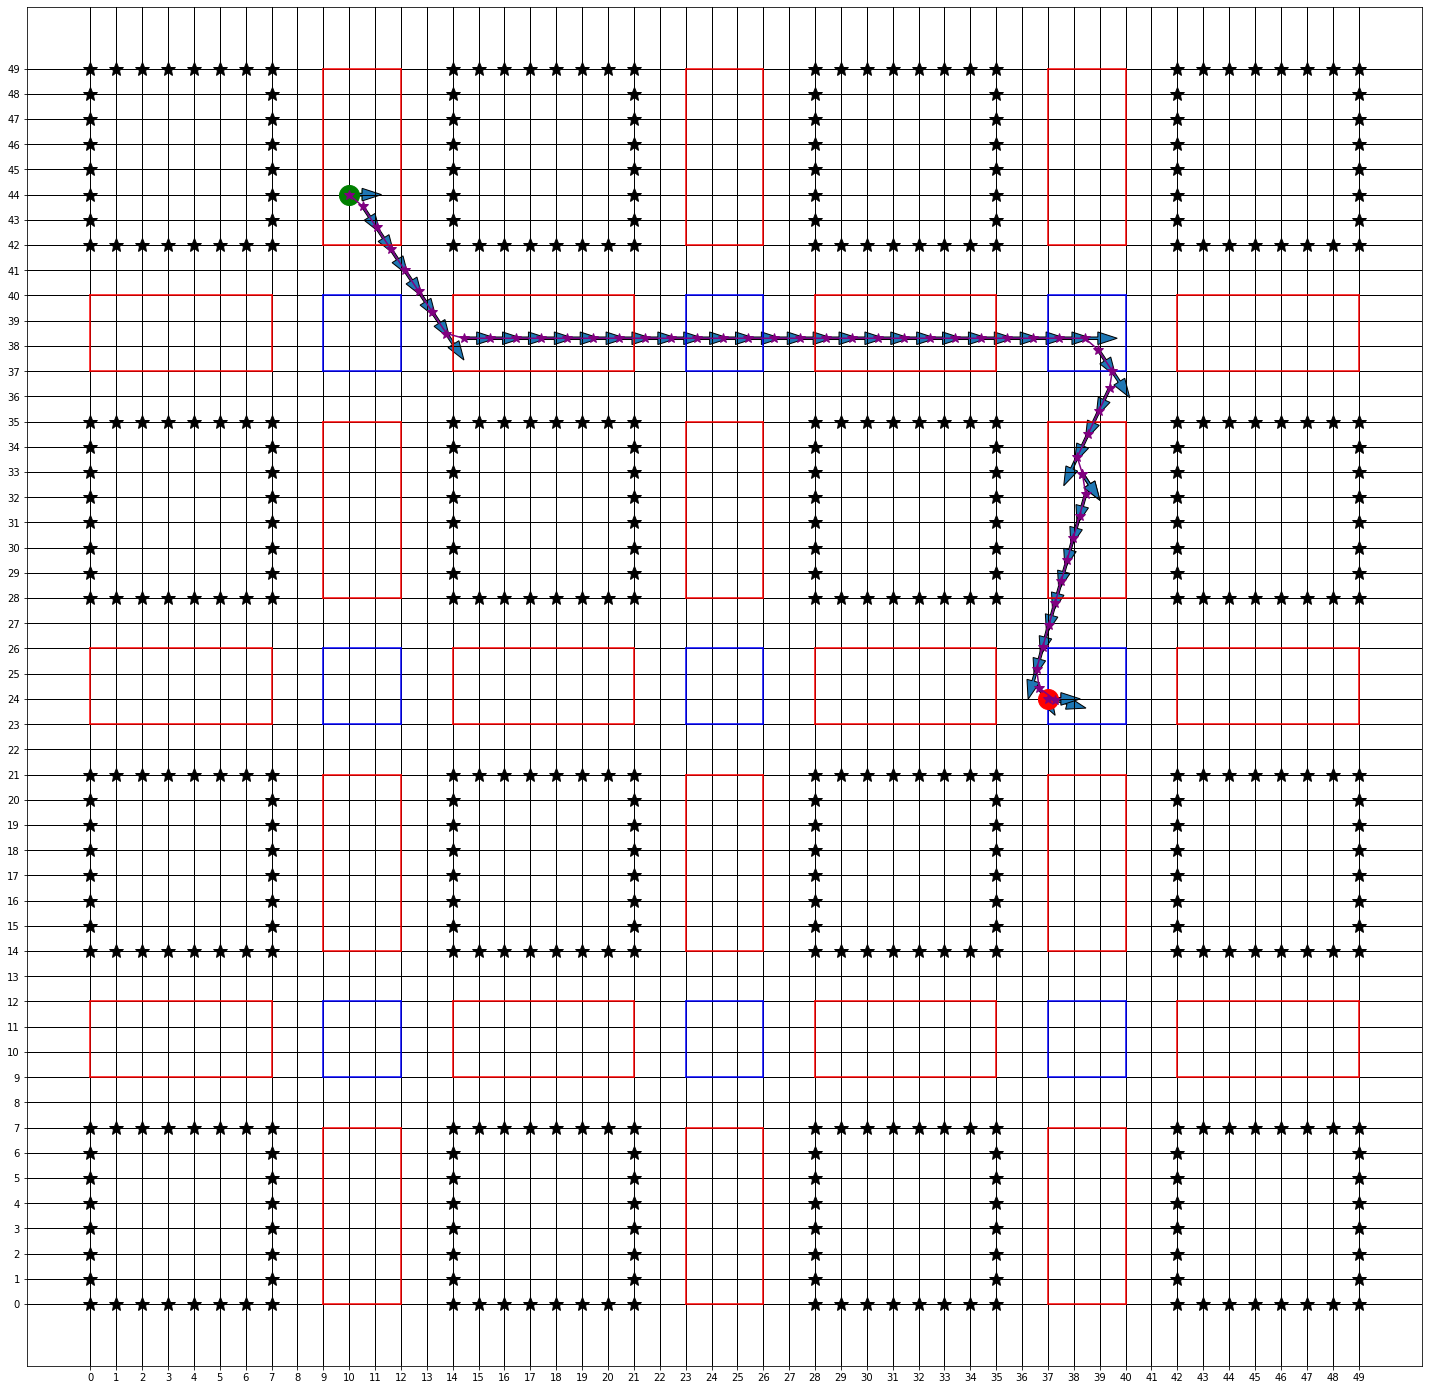

In [15]:
#PRINTER
#colormap
cmap = colors.ListedColormap(['white', 'black'])
bounds = [0,.5,1]
norm = colors.BoundaryNorm(bounds, cmap.N)




fig, ax = plt.subplots()

for i in intersections:
    line1 = [[i[0][0],i[0][0]],[i[1][0],i[1][1]] ]
    line2 = [[i[0][1],i[0][1]],[i[1][0],i[1][1]] ]
    line3 = [[i[0][0],i[0][1]],[i[1][0],i[1][0]] ]
    line4 = [[i[0][0],i[0][1]],[i[1][1],i[1][1]] ]
    ax.plot(line1[0], line1[1], linestyle='solid', color='blue')
    ax.plot(line2[0], line2[1], linestyle='solid', color='blue')
    ax.plot(line3[0], line3[1], linestyle='solid', color='blue')
    ax.plot(line4[0], line4[1], linestyle='solid', color='blue')
for i in streets:
    line1 = [[i[0][0],i[0][0]],[i[1][0],i[1][1]] ]
    line2 = [[i[0][1],i[0][1]],[i[1][0],i[1][1]] ]
    line3 = [[i[0][0],i[0][1]],[i[1][0],i[1][0]] ]
    line4 = [[i[0][0],i[0][1]],[i[1][1],i[1][1]] ]
    ax.plot(line1[0], line1[1], linestyle='solid', color='red')
    ax.plot(line2[0], line2[1], linestyle='solid', color='red')
    ax.plot(line3[0], line3[1], linestyle='solid', color='red')
    ax.plot(line4[0], line4[1], linestyle='solid', color='red')

#x.imshow(data,extent=[0, rows, 0, cols], cmap=cmap, norm=norm)
ax.plot(start.position[0], start.position[1], marker='.', color='green', linestyle='none', MarkerSize=40)
x, y, a, b = start.position[0], start.position[1], 1, np.rad2deg(start.orientation)
x1, y1 = rpoint(x,y,a,b)
ax.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,color='green')
ax.plot(end.position[0], end.position[1], marker='.', color='red', linestyle='none', MarkerSize=40)
x, y, a, b = end.position[0], end.position[1], 1, np.rad2deg(end.orientation)
x1, y1 = rpoint(x,y,a,b)
ax.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .4, width = .1,color='red')

# ax.plot(path_X, path_Y, marker='.', color='blue', MarkerSize=10)
ax.plot(state_X, state_Y, marker='*', color='purple', MarkerSize=10)
# ax.plot(smoothPath_X, smoothPath_Y, marker='*', color='green', MarkerSize=10)
ax.plot(obs_X, obs_Y, marker='*', color='black', MarkerSize=15, linestyle='none')
#draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(0, rows, 1))
ax.set_yticks(np.arange(0, cols, 1))
for index in range(len(state_O)):
    x, y, a, b = state_X[index], state_Y[index], 1, np.rad2deg(state_O[index])
    x1, y1 = rpoint(x,y,a,b)
    ax.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .5, width = .1,)
# for index in range(len(smoothPath_O)):
#     x, y, a, b = smoothPath_X[index], smoothPath_Y[index], 1, np.rad2deg(smoothPath_O[index])
#     x1, y1 = rpoint(x,y,a,b)
#     plt.arrow(x, y, (x1-x)/2, (y1-y)/2, head_width = .5, width = .1,)
    
plt.rcParams['figure.figsize'] = [25, 25]
plt.show()

In [16]:
#Overall Algorithm
#First the car will report any obstacles in its way
#if any, add to map w/ appropriate location
#then perform a* algorithm with global map
#do a check if there's a collision
#if so, run machine learning algorithm to change, unless there are no changes to the map
#Should only use machine learning algo IF and only IF there are changes to the map
#return path to car, use route instructions to move car appropriately

In [17]:
#ALL MEASUREMENTS IN CM